In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('e-commerce.csv')

In [3]:
df.head()

,customerNumber,productName,orderMonth,priceEach,quantityOrdered,final_payment
0,363,1917 Grand Touring Sedan,1,136.00,30,4080.00
1,363,1911 Ford Town Car,1,55.09,50,2754.50
2,363,1932 Alfa Romeo 8C2300 Spider Sport,1,75.46,22,1660.12
3,363,1936 Mercedes Benz 500k Roadster,1,35.29,49,1729.21
4,128,1932 Model A Ford J-Coupe,1,108.06,25,2701.50


In [27]:
filtered_products = df.groupby('productName').agg({'final_payment': 'sum'}).sort_values('final_payment', ascending=False)[:5].index
filtered_products

Index(['1992 Ferrari 360 Spider red', '2001 Ferrari Enzo',
       '1952 Alpine Renault 1300', '2003 Harley-Davidson Eagle Drag Bike',
       '1968 Ford Mustang'],
      dtype='object', name='productName')

In [34]:
filtered_data_product = df.groupby(['productName', 'orderMonth']).agg({'quantityOrdered': 'sum', 'final_payment': 'sum'}).reset_index()
filtered_data_product

,productName,orderMonth,quantityOrdered,final_payment
0,18th Century Vintage Horse Carriage,1,95,8425.75
1,18th Century Vintage Horse Carriage,2,35,3262.00
2,18th Century Vintage Horse Carriage,3,103,10175.61
3,18th Century Vintage Horse Carriage,4,63,5374.11
4,18th Century Vintage Horse Carriage,5,51,4863.24
...,...,...,...,...
1296,The USS Constitution Ship,8,78,5378.58
1297,The USS Constitution Ship,9,44,3148.64
1298,The USS Constitution Ship,10,125,7665.96
1299,The USS Constitution Ship,11,240,15480.33


In [35]:
for product in filtered_products:
    print(product)

1992 Ferrari 360 Spider red
2001 Ferrari Enzo
1952 Alpine Renault 1300
2003 Harley-Davidson Eagle Drag Bike
1968 Ford Mustang


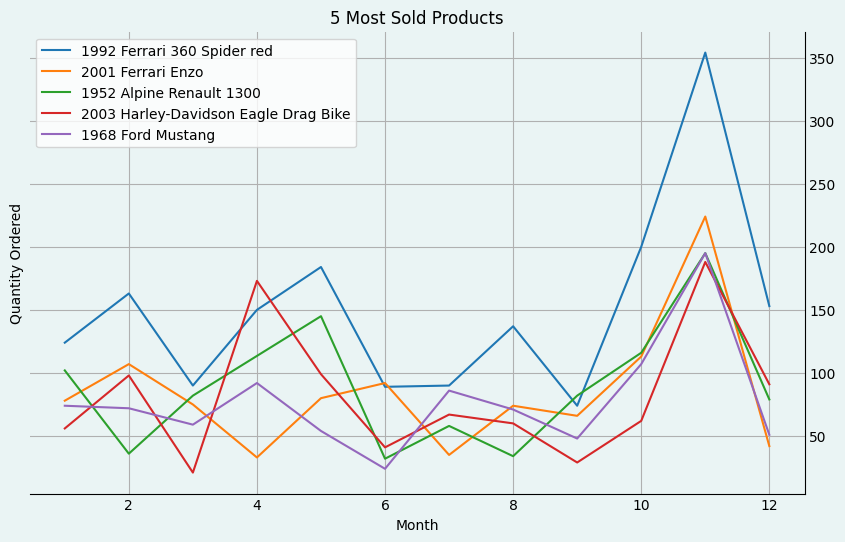

In [39]:
fig, ax = plt.subplots(figsize=(10,6))
for product in filtered_products:
    ax.plot(filtered_data_product[filtered_data_product['productName'] == product]['orderMonth'], filtered_data_product[filtered_data_product['productName'] == product]['quantityOrdered'])

ax.spines[['left', 'top']].set_visible(False)
ax.tick_params(length=0)
ax.set_facecolor('#EAF4f4')
fig.set_facecolor('#EAF4f4')
ax.yaxis.set_ticks_position('right')
ax.set_xlabel('Month')
ax.set_ylabel('Quantity Ordered')
ax.set_title('5 Most Sold Products')
plt.grid(True)
plt.legend(filtered_products)
plt.show()

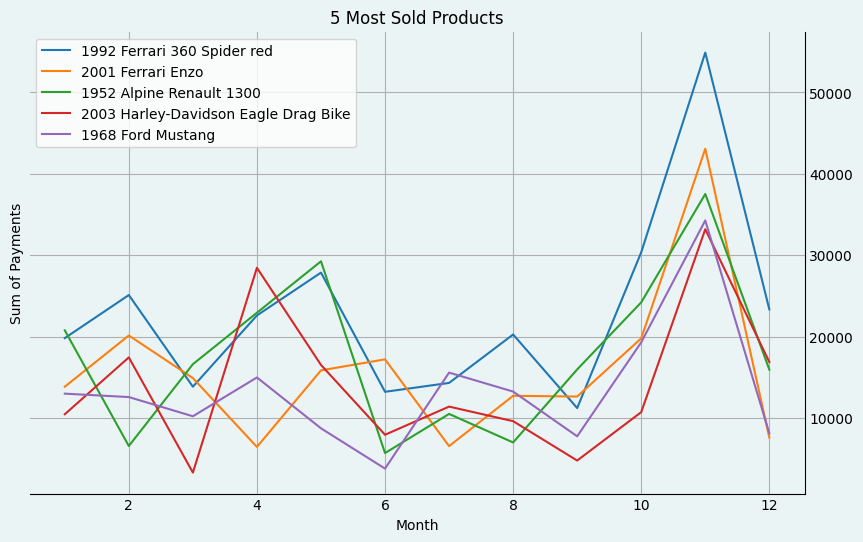

In [40]:
fig, ax = plt.subplots(figsize=(10,6))
for product in filtered_products:
    ax.plot(filtered_data_product[filtered_data_product['productName'] == product]['orderMonth'], filtered_data_product[filtered_data_product['productName'] == product]['final_payment'])

ax.spines[['left', 'top']].set_visible(False)
ax.tick_params(length=0)
ax.set_facecolor('#EAF4f4')
fig.set_facecolor('#EAF4f4')
ax.yaxis.set_ticks_position('right')
ax.set_xlabel('Month')
ax.set_ylabel('Sum of Payments')
ax.set_title('5 Most Sold Products')
plt.grid(True)
plt.legend(filtered_products)
plt.show()